# Imports

In [ ]:
import os
import requests
import shutil
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Data ImageFolder

In [ ]:
train_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()])

In [ ]:
data = datasets.ImageFolder(root="Melanoma Cancer Dataset/train")

In [ ]:
img, label = data[0]

img.size, label

((224, 224), 0)

In [ ]:
test_data = datasets.ImageFolder(root="Melanoma Cancer Dataset/test",
                                 transform=test_transform)

In [ ]:
train_size = int(0.8 * len(data))
val_size = len(data) - train_size

train_data, val_data = random_split(data, [train_size, val_size])

In [ ]:
train_data = datasets.ImageFolder(root="Melanoma Cancer Dataset/train",
                                 transform=train_transform)

val_data = datasets.ImageFolder(root="Melanoma Cancer Dataset/train",
                               transform=train_transform)

In [42]:
type(train_data), type(val_data), type(test_data)

(torchvision.datasets.folder.ImageFolder,
 torchvision.datasets.folder.ImageFolder,
 torchvision.datasets.folder.ImageFolder)

In [46]:
classes = train_data.classes
class_to_idx = train_data.class_to_idx

classes, class_to_idx

(['Benign', 'Malignant'], {'Benign': 0, 'Malignant': 1})

In [64]:
def plot_rand_imagefolder(dataset, n=3):
  fig, axes = plt.subplots(1, n, figsize=(10, 5))
  for i in range(n):
    idx = random.randint(0, len(dataset))
    img, label = dataset[idx]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(dataset.classes[label])
    axes[i].axis('off')

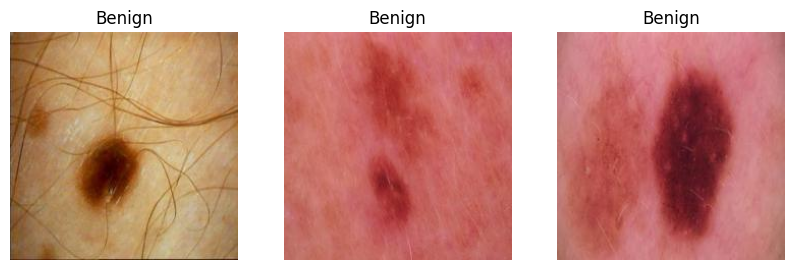

In [65]:
plot_rand_imagefolder(train_data)

# Image DataLoader

In [66]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [67]:
img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [71]:
def plot_rand_dataloader(dataset, n=3):
  fig, axes = plt.subplots(1, n, figsize=(10, 5))
  for i in range(n):
    idx = random.randint(0, len(dataset))
    img, label = next(iter(dataset))
    axes[i].imshow(img[i].permute(1, 2, 0))
    axes[i].set_title(classes[label[i]])
    axes[i].axis('off')

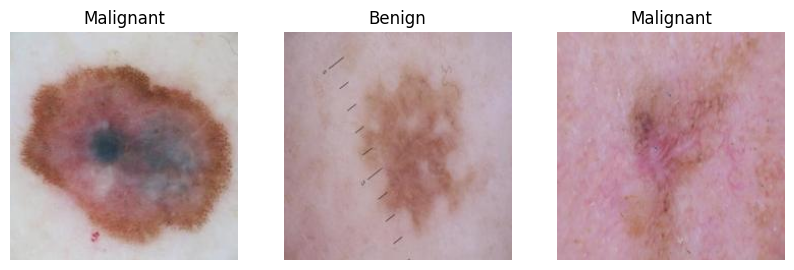

In [77]:
plot_rand_dataloader(train_dataloader)

# Model Experiment

## Model 0

### Model Building

In [3]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

NameError: name 'torch' is not defined

In [ ]:
class MelanomaCancerModelV0(nn.Module):
  def __init__(self):
    super().__init()

    self.conv_layer_1 = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_layer_2 = nn.Sequential(
      nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=64*56*56, out_features=128),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(in_features=128, out_features=2)
    )

  def forward(self, x):
    return self.classifier(self.conv_layer_2(self.conv_layer_1(x)))

NameError: name 'nn' is not defined